# COLOR DECTETION  IN IMAGES
TASK 2

In [1]:
#import libraries
from sklearn.cluster import KMeans

In [2]:
import matplotlib.pyplot as plt

In [3]:
import cv2

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline

In [5]:
cd \Users\dell\Desktop\The sparks foundations\color detection

C:\Users\dell\Desktop\The sparks foundations\color detection


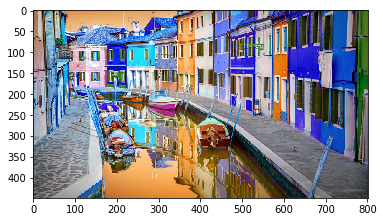

In [6]:
figure=cv2.imread('Capture1.PNG')
plt.imshow(figure)

# RED GREEN BLUE IMAGE

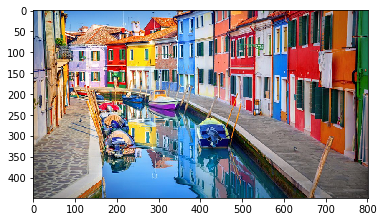

In [7]:
figure=cv2.cvtColor(figure,cv2.COLOR_BGR2RGB)
plt.imshow(figure)

# CONVERTING INTO GRAY

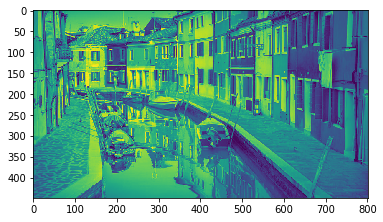

In [8]:
Gray_fig=cv2.cvtColor(figure,cv2.COLOR_BGR2GRAY)
plt.imshow(Gray_fig)

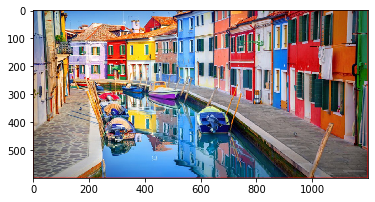

In [9]:
resized_image=cv2.resize(figure,(1200,600))
plt.imshow(resized_image)

In [10]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [11]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [12]:

modified_image = cv2.resize(figure, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [13]:
def RGB2HEX(color):       
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


# SEARCHING IMAGES AS PER COLOR

In [14]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

# IDENTIFYING THE COLOR RATIO USING PIE CHART

[array([208.7719071 , 206.52259147, 209.3465399 ]),
 array([ 84.9501842 , 155.74746938, 223.14158176]),
 array([169.02812992, 155.89025579, 153.23119046]),
 array([43.0373204 , 80.27549916, 97.95293898]),
 array([189.51401401,  51.36952337,  29.58897359]),
 array([30.88487703, 42.26867011, 38.94703596]),
 array([120.11022921, 108.30781755, 108.77590374]),
 array([226.38498038, 157.98482807,  82.56059985])]

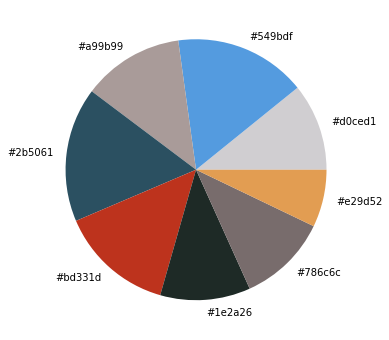

In [15]:
Colors_to_identify = 8
show_pie_chart = True
get_colors(get_image("Capture1.PNG"), Colors_to_identify, show_pie_chart)

# TESTING THE SAMPLE IMAGES

In [16]:
color_detection = 'figure'
# Add the Colors If You Want FORMAT: RGB
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED': [128, 0, 0],
    'BLACK': [0, 0, 0],
    'WHITE': [255, 255, 255]
}
COLOR_DOMINANCE = {
    "HIGH": 1,
    "MEDIUM": 3,
    "LOW": 6
}
images = []

for file in os.listdir(color_detection):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(color_detection, file)))


# VIEW OF IMAGES

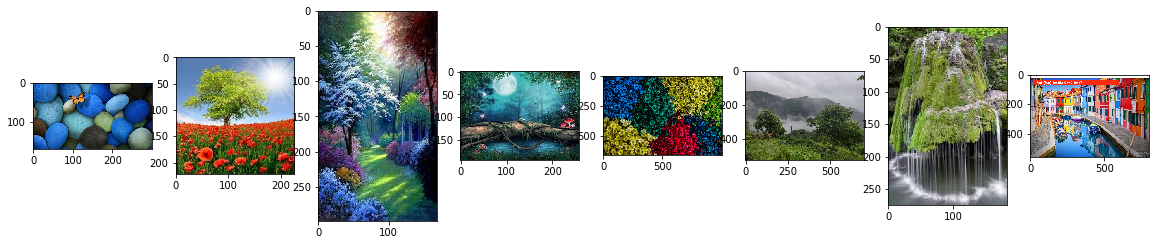

In [17]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [18]:
 def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))
    select_image = False
    for i in range(number_of_colors):
        try:
            curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
            diff = deltaE_cie76(selected_color, curr_color)
            if (diff < threshold):
                select_image = True
        except:
            pass
    
    return select_image

def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            
            plt.subplot(1, len(images), index)
            plt.imshow(images[i])
            index += 1

# TESTING 

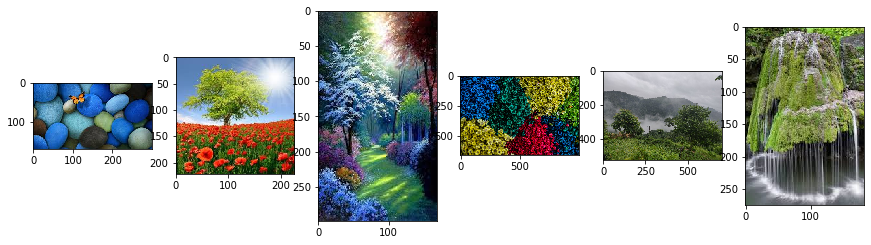

In [19]:
selected_color = COLORS["GREEN"]
threshold = 60
plt.figure(figsize = (20, 10))
show_selected_images(images, selected_color, threshold, COLOR_DOMINANCE["LOW"])


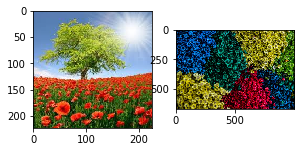

In [20]:
selected_color = COLORS["YELLOW
                        "]
threshold = 60
plt.figure(figsize = (20, 10))
show_selected_images(images, selected_color, threshold, COLOR_DOMINANCE["LOW"])

#                    THANK YOU